# FIFA 21 Project

## In this project, we will analyze data from players of the Fifa 21 game, perform an exploratory data analysis, and apply machine learning concepts. We will dive into the dataset to extract valuable insights and build predictive models to enhance our understanding of player performance in the game. This analysis will provide a comprehensive overview of the dataset, helping us draw meaningful conclusions

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fifa 21 project/players_21.csv',
                 index_col=0)

In [ ]:
# Dataframe preview
df.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [ ]:
# Explore de data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18944 entries, 158023 to 257936
Columns: 105 entries, player_url to rb
dtypes: float64(18), int64(43), object(44)
memory usage: 15.3+ MB


In [ ]:
# Data type checking
df.select_dtypes(include=float)

,league_rank,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,defending_marking
sofifa_id,,,,,,,,,,,,,,,,,,
158023,1.0,138400000.0,10.0,2021.0,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20801,1.0,75900000.0,7.0,2022.0,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200389,1.0,159400000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,NaN
188545,1.0,132000000.0,9.0,2023.0,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190871,1.0,166500000.0,10.0,2022.0,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256679,1.0,91000.0,28.0,2024.0,NaN,63.0,37.0,50.0,47.0,41.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257710,1.0,57000.0,25.0,2020.0,NaN,58.0,23.0,26.0,27.0,50.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250989,1.0,57000.0,2.0,2022.0,NaN,51.0,25.0,29.0,36.0,45.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='sofifa_id'>

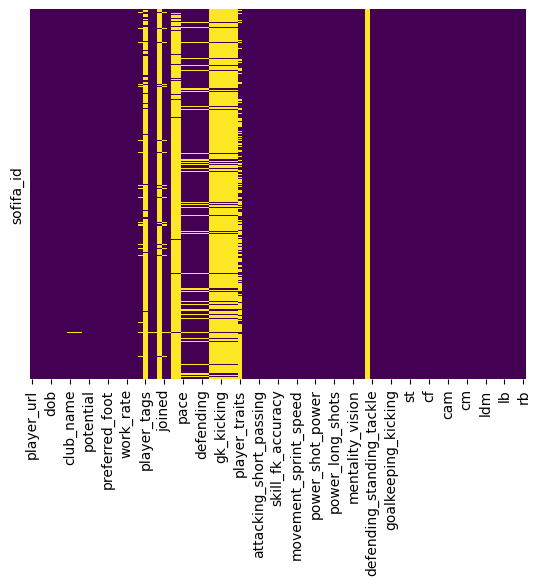

In [ ]:
# Identify missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Fill NaN values ​​with a default value
df['contract_valid_until'] = df['contract_valid_until'].fillna(0).astype(int)
df['team_jersey_number'] = df['team_jersey_number'].fillna(0).astype(int)
df['club_name'] = df['club_name'].fillna('No team').astype(object)
df['release_clause_eur'] = df['release_clause_eur'].fillna(0).astype(int)

In [ ]:
# Correct data types
df['contract_valid_until'] = df['contract_valid_until'].astype(int)
df['team_jersey_number'] = df['team_jersey_number'].astype(int)
df['release_clause_eur'] = df['release_clause_eur'].astype(int)
df['wage_eur'] = df['wage_eur'].astype(int)
df['dob'] = pd.to_datetime(df['dob'])
df["joined"]=pd.to_datetime(df["joined"])

In [ ]:
# Top ten players with the greatest weight
players_weights = df[['short_name', 'weight_kg']]
players_weights.nlargest(10, 'weight_kg')

,short_name,weight_kg
sofifa_id,,
156321,A. Akinfenwa,110
179685,C. Seitz,107
225530,O. Oularé,104
195357,F. Farnolle,104
253849,D. Corozo,104
199833,L. Unnerstall,103
190169,D. Telgenkamp,103
239746,L. Watkowiak,103
257274,D. Turnbull,103


In [ ]:
# Top ten dribblers
players_dribbling = df[['short_name', 'dribbling']]
players_dribbling.nlargest(10, 'dribbling')

,short_name,dribbling
sofifa_id,,
158023,L. Messi,95.0
190871,Neymar Jr,94.0
211110,P. Dybala,92.0
183277,E. Hazard,92.0
218667,Bernardo Silva,92.0
231747,K. Mbappé,91.0
233049,J. Sancho,91.0
198219,L. Insigne,91.0
190483,Douglas Costa,91.0


In [ ]:
# Top ten shooting
players_shooting = df[['short_name', 'shooting']]
players_shooting.nlargest(10, 'shooting')

,short_name,shooting
sofifa_id,,
20801,Cristiano Ronaldo,93.0
158023,L. Messi,92.0
188545,R. Lewandowski,91.0
202126,H. Kane,91.0
153079,S. Agüero,90.0
176580,L. Suárez,90.0
192387,C. Immobile,88.0
41236,Z. Ibrahimović,88.0
239085,E. Haaland,87.0


In [ ]:
#The top 10 most valuable clubs in the world are Tottenham Hotspurs, PSG,
# Arsenal, Chelsea, Man City, Liverpool, Manchester United, Bayern Munich,
# Real Madrid and Barcelona.
top_valuable_club_names = ('FC Barcelona', 'Tottenham Hotspur',
                           'Paris Saint-Germain', 'Chelsea',
                           'Manchester City', 'Manchester United',
                           'Arsenal', 'Liverpool',
                           'Real Madrid', 'Bayern Munich')

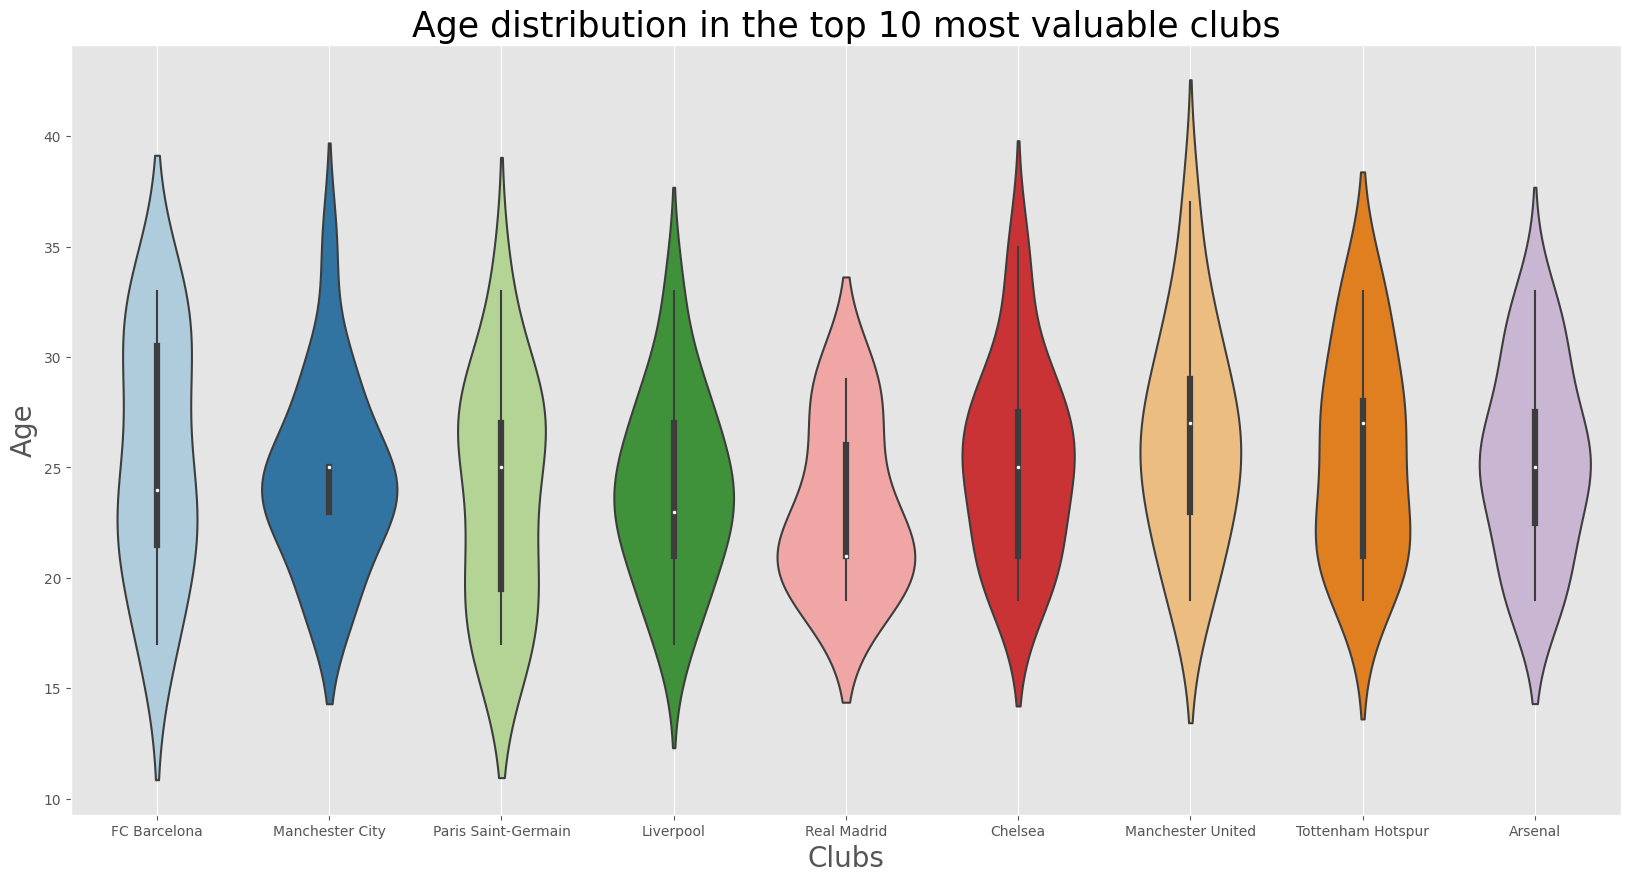

In [ ]:
# Let's see the age distribution in the most valuable clubs
plt.style.use('ggplot')

clubs = df.loc[df['club_name'].isin(top_valuable_club_names) & df['age']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x='club_name', y='age', data=clubs, palette='Paired')
ax.set_title(label='Age distribution in the top 10 most valuable clubs',
             fontsize=25)
plt.xlabel('Clubs', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.grid()

In [ ]:
club_mean = df[df['club_name'] == 'Manchester City']['age'].mean()
print("Average age at Manchester City:", club_mean)

Average age at Manchester City: 24.636363636363637


In [ ]:
# Changes to predict player value

from datetime import datetime as dt

# We create the column year in which the player was born
df["born_year"]=df["dob"].dt.year

# Convert this columns to millions for easier readability
df["value_eur"]=df["value_eur"]/1000000
df["wage_eur"]=(df["wage_eur"]*48)/1000000
df["release_clause_eur"]=df["release_clause_eur"]/1000000

# Rename specific columns for clarity
df.rename(columns={"value_eur":"value_eur_m","wage_eur":"wage_eur_m",
                   "release_clause_eur":"release_clause_eur_m"},inplace=True)

# Create new features:

# Create new feature 'league_value_B' by summing the player values
# within each league, divided by 1000
df["league_value_B"]=df.groupby("league_name")["value_eur_m"].transform("sum")/1000

# Categorize player positions into 'attack,' 'defense,' 'midfield,'
# and 'goalkeeper' using lambda function

df["team_position"]=df["team_position"].apply(lambda x: "attack" if x in ["LS","ST","RS","LW","LF","CF","RF","RW"]
                                              else ("defense" if x in ["LWB","LB","LCB","CB","RCB","RB"] else
                                                    ("midfield" if x in ["LDM","CDM","RDM","LM","LCM","CM","RCM","RM","LAM","CAM","RAM"]
                                                     else("goalkeeper" if x in ["GK"] else "none"))))

# Calculate player 'loyalty' based on the year they joined the club
df["loyalty"]=2020-df["joined"].dt.year

# Categorize player 'body_type' as 'famous' or 'not famous'

df["body_type"]=df["body_type"].apply(lambda x: "not famous" if x.startswith("PLAYER_BODY_TYPE_") else "famous")

# Calculate the number of player traits
df["player_traits"]=df["player_traits"].apply(lambda x: len(x.split(",")) if type(x)==str else 0)

# Determine 'team_quality' by comparing the club's
# total value to the top 500 clubs
vf=df.groupby("club_name")[["value_eur_m"]].sum().sort_values(by="value_eur_m",
                                                              ascending=False).head(500)
df["team_quality"]=df["club_name"].apply(lambda x: "hight_quality" if x in vf.index else "low_quality")

# Let's see the changes in the Dataframe
df.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,rwb,lb,lcb,cb,rcb,rb,born_year,league_value_B,loyalty,team_quality
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,62+3,52+3,52+3,52+3,62+3,1987,5.266865,16.0,hight_quality
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,54+3,54+3,54+3,61+3,1985,3.984970,2.0,hight_quality
200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,32+3,33+3,33+3,33+3,32+3,1993,5.266865,6.0,hight_quality
188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,61+3,60+3,60+3,60+3,61+3,1988,3.858735,6.0,hight_quality
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,49+3,49+3,49+3,62+3,1992,2.948835,3.0,hight_quality


## It is even possible to make clusters around the position on the field and make a more precise prediction.

(array([  0.5,   2.5,   4.5,   6.5,   8.5,  10.5,  12.5,  14.5,  16.5,
         18.5,  20.5,  22.5,  24.5,  26.5,  28.5,  30.5,  32.5,  34.5,
         36.5,  38.5,  40.5,  42.5,  44.5,  46.5,  48.5,  50.5,  52.5,
         54.5,  56.5,  58.5,  60.5,  62.5,  64.5,  66.5,  68.5,  70.5,
         72.5,  74.5,  76.5,  78.5,  80.5,  82.5,  84.5,  86.5,  88.5,
         90.5,  92.5,  94.5,  96.5,  98.5, 100.5, 102.5, 104.5, 106.5,
        108.5]),
 [Text(0.5, 0, 'player_url'),
  Text(2.5, 0, 'long_name'),
  Text(4.5, 0, 'dob'),
  Text(6.5, 0, 'weight_kg'),
  Text(8.5, 0, 'club_name'),
  Text(10.5, 0, 'league_rank'),
  Text(12.5, 0, 'potential'),
  Text(14.5, 0, 'wage_eur_m'),
  Text(16.5, 0, 'preferred_foot'),
  Text(18.5, 0, 'weak_foot'),
  Text(20.5, 0, 'work_rate'),
  Text(22.5, 0, 'real_face'),
  Text(24.5, 0, 'player_tags'),
  Text(26.5, 0, 'team_jersey_number'),
  Text(28.5, 0, 'joined'),
  Text(30.5, 0, 'nation_position'),
  Text(32.5, 0, 'pace'),
  Text(34.5, 0, 'passing'),
  Text(36.5,

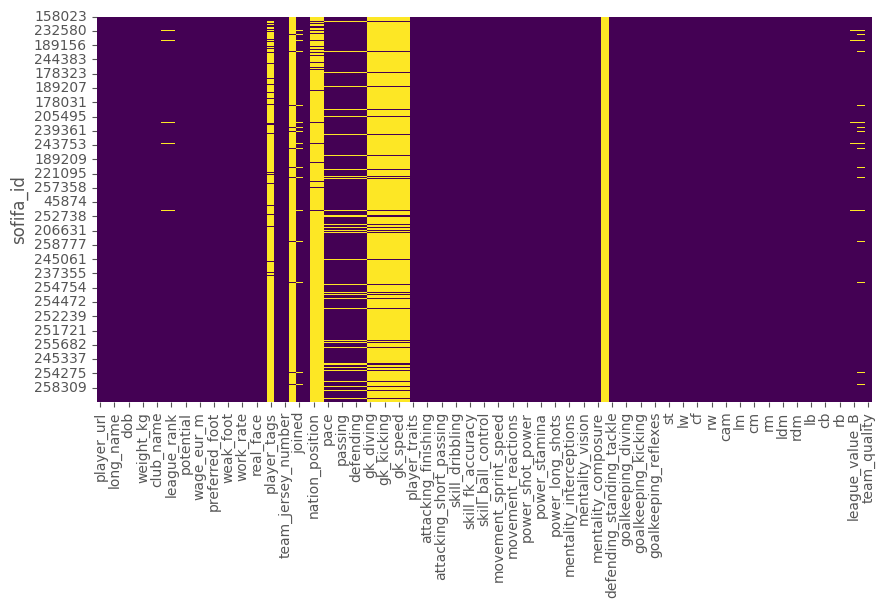

In [ ]:
# Let's check for null values ​​in the latest changes
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.xticks(rotation=90)
# Fields like: pace, defending, gk_kicking, joined, player_tags
# and defending_standing_tackle can have null values

In [ ]:
# Handling the missing values by using KNN imputer

num=df.select_dtypes(include=['float64','int64'])


for i in df.columns:
    if df[i].isnull().sum()>len(df)*0.90:
        df.drop(i,axis=1,inplace=True)

df.isnull().sum()

player_url          0
short_name          0
long_name           0
age                 0
dob                 0
                 ... 
rb                  0
born_year           0
league_value_B    225
loyalty           983
team_quality        0
Length: 104, dtype: int64

## This snippet removes columns from the DataFrame that have more than 90% null values, which can be useful for data cleaning before conducting data analysis or modeling.

In [ ]:
# Missing values ​​are filled with their KNN-based estimates.
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])

df.isnull().sum()

player_url        0
short_name        0
long_name         0
age               0
dob               0
                 ..
rb                0
born_year         0
league_value_B    0
loyalty           0
team_quality      0
Length: 104, dtype: int64

## We use the KNN algorithm to estimate and fill these missing values ​​based on the values ​​of the existing columns and their nearest neighbors

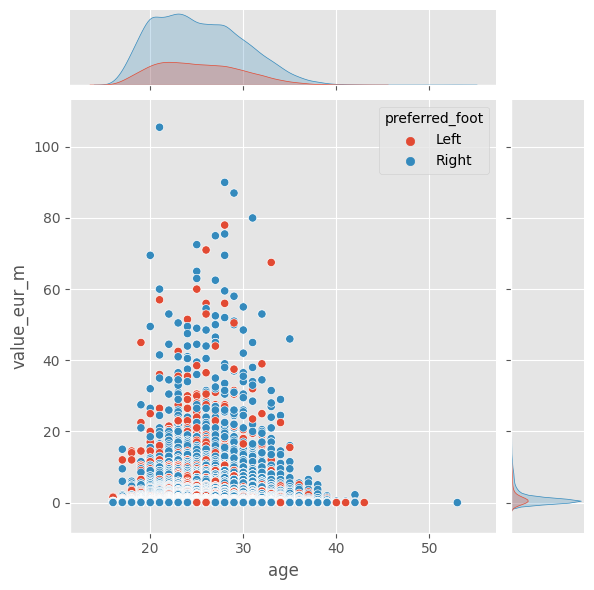

In [ ]:
# There is a certain relationship between the age and the value of the player in euros?
sns.jointplot(x='age', y='value_eur_m',
              data=df, hue='preferred_foot')

## The highest player prices are concentrated in the age range of 20 to 30 years old, which is highly logical.

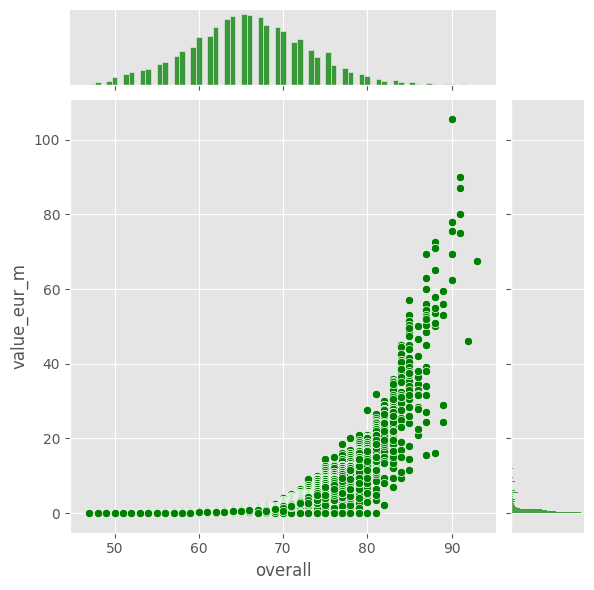

In [ ]:
# Let's see the overall versus the value of the player in millions of euros
sns.jointplot(x='overall', y='value_eur_m',
              data=df, color='g')

## The 'overall' rating represents a FIFA player's performance ratio.

## We can observe a kind of relationship between the overall and the value in millions of euros

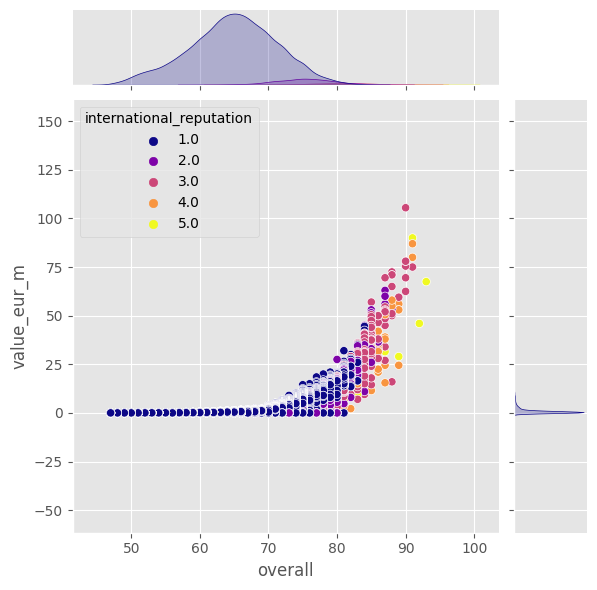

In [ ]:
# It is interesting to see it segmented by international reputation
# which would be a measure like marketing.
sns.jointplot(x='overall', y='value_eur_m',
              data=df, palette='plasma', hue='international_reputation')

## Another variable that appears to explain a player's value in millions of euros is their international reputation, which is closely tied to the player marketing

<ipython-input-41-da0ee6ff2067>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.iloc[:,0:78].corr()


Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 4000x2000 with 0 Axes>

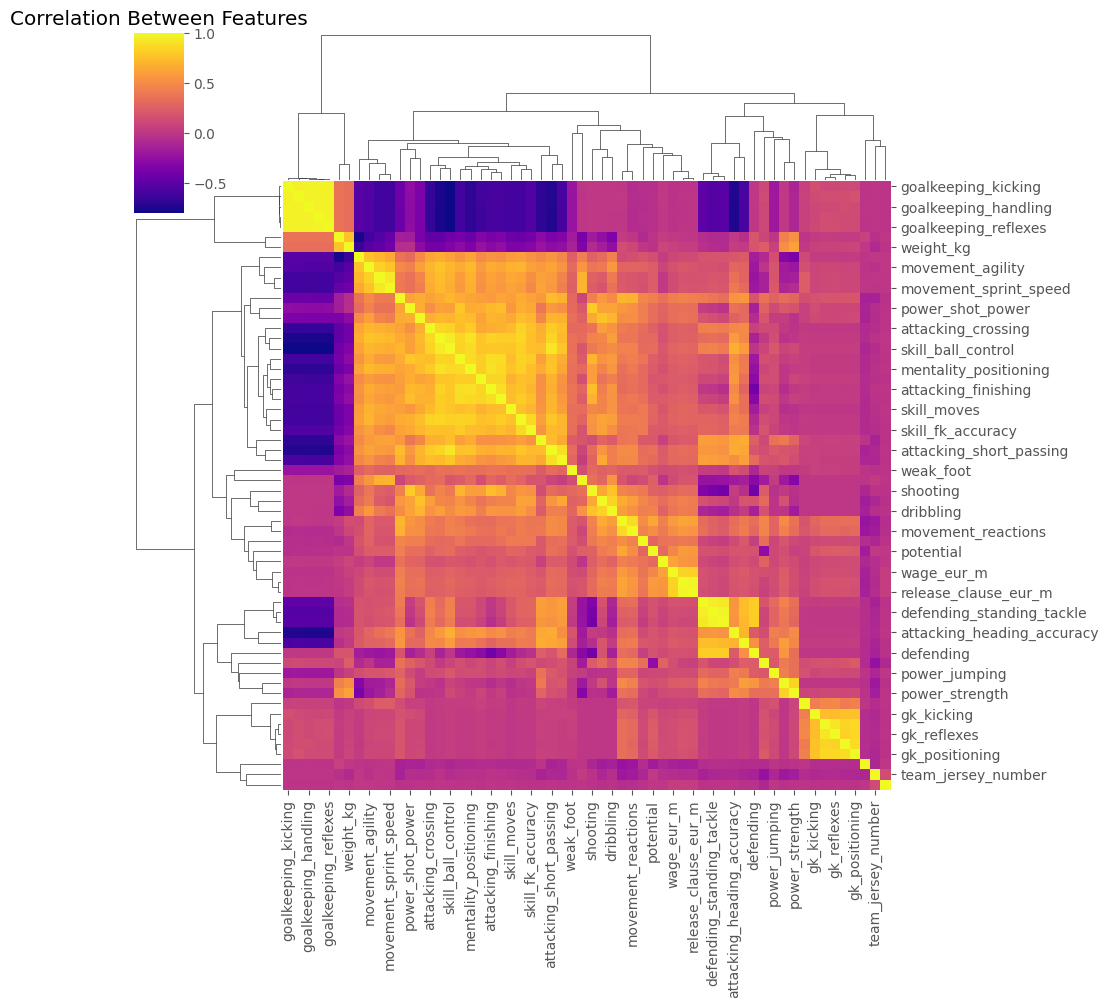

In [ ]:
# Check the correlation between the features

# Correlation matrix
corr=df.iloc[:,0:78].corr()
plt.figure(figsize=(40,20))
sns.clustermap(corr,cmap="plasma")
plt.title("Correlation Between Features")

Text(0.5, 1.0, 'Distribution of all Variables')

<Figure size 2000x2000 with 0 Axes>

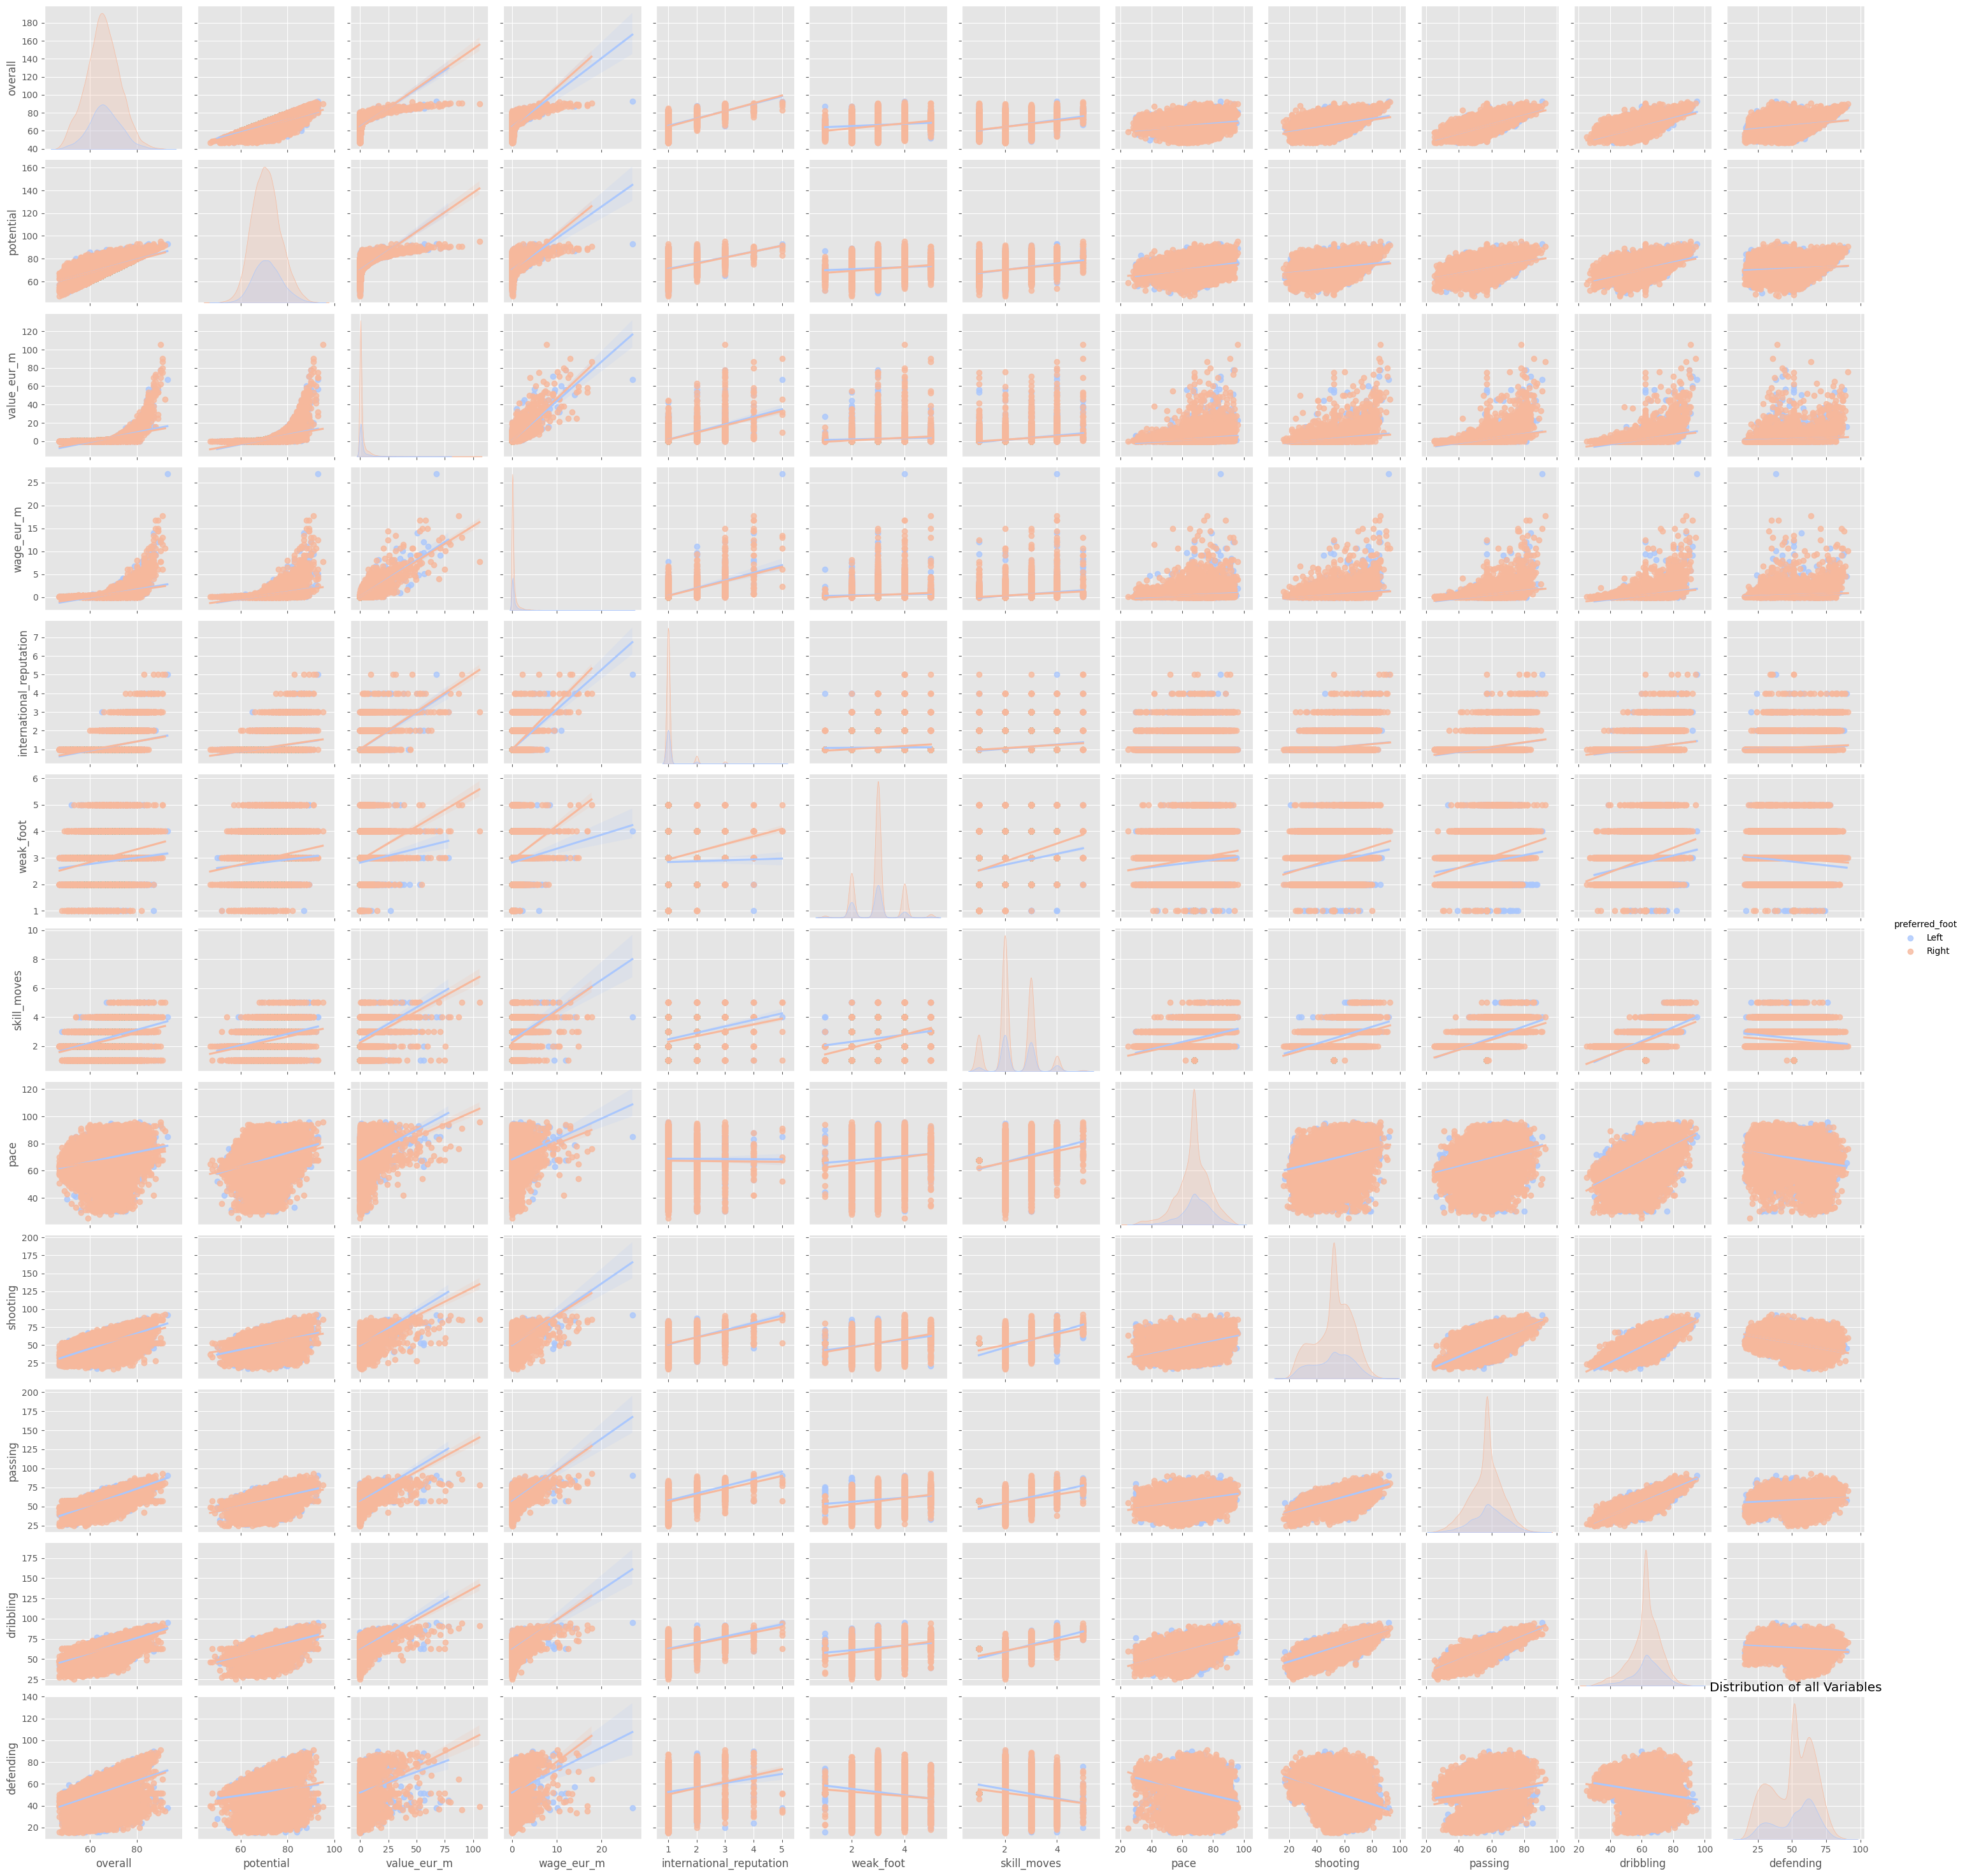

In [ ]:
# Pairplot of the selected features

features=['overall','potential','value_eur_m','wage_eur_m','international_reputation','weak_foot','skill_moves',
            'pace','shooting','passing','dribbling','defending',"preferred_foot"]


plt.figure(figsize=(20,20))
sns.pairplot(df[features],kind="reg",diag_kind="kde",
             palette="coolwarm",hue="preferred_foot");
plt.title("Distribution of all Variables")

## We will explore the relationships between various player characteristics and their distributions, taking into account the players' preferred foot as a differentiating factor. Our particular focus will be on the players' values in millions of euros and how they relate to other variables.

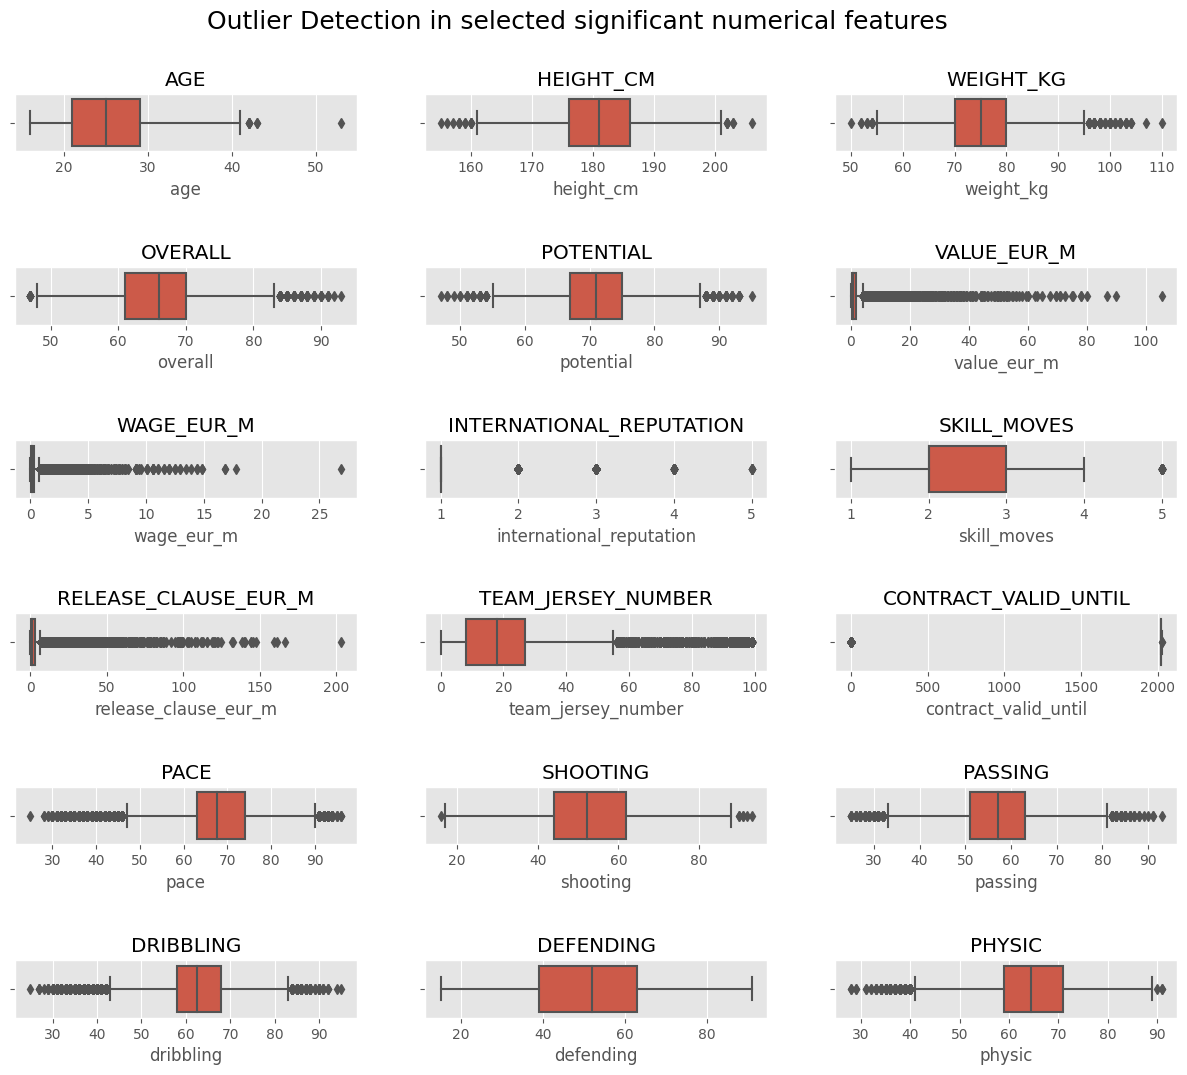

In [ ]:
# Search for outliers

# Selecting related features:
num=df.select_dtypes(include=['int64','float64'])

# Remove unnecessary columns
num.drop(["league_rank","weak_foot"],axis=1,inplace=True)

# Creating a figure with multiple subplots (3x6)
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=2)
fig.suptitle("Outlier Detection in selected significant numerical features",
             fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(num.iloc[:,0:18], axs.ravel()):
    # filter df for ticker and plot on specified axes
    sns.boxplot(data=num, x=ticker, ax=ax)
    # chart formatting
    ax.set_title(ticker.upper())


plt.show()

## Boxplots help identify potential outliers in data

In [ ]:
#  Outlier threshold:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    q1=dataframe[col_name].quantile(q1)
    q3=dataframe[col_name].quantile(q3)
    IQR=q3-q1

    up_limit=q3+1.5*IQR
    low_limit=q1-1.5*IQR

    return low_limit,up_limit

# Check outliers:
def check_outliers(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]<low_limit) | (dataframe[col_name]>up_limit)].any(axis=None):
        return True

    else:
        return False

## The function outlier_thresholds calculates the upper and lower bounds for outliers in a specific column, while the check_outliers function verifies the presence of outliers in that same column. Outliers are determined using quartiles and the interquartile range (IQR). These functions are valuable for identifying and managing outliers in data analysis.

In [ ]:
# Replacing outliers with thresholds:
def replace_with_thresholds(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    if low_limit > 0:
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
    else:
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit

replace_with_thresholds(df,"age")

print("After filling with thresholds:")
print("Age:",check_outliers(df,"age"))

After filling with thresholds:
Age: False


## We replace outliers in the "age" column of the DataFrame with predefined limits (thresholds). To do this, we use the previously defined "outlier_thresholds" function to calculate the upper and lower limits. Then, we check if the lower limit value is greater than zero. If it is, we assign the lower limit to values in the column that are less than that limit, and we assign the upper limit to values greater than it. If the lower limit is zero or negative, we simply assign the upper limit to values that exceed that threshold.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor

In [ ]:
# Label encoding:

# We create df1 by copying the first 20 columns of the original DataFrame df
df1=df.copy()
df1 = df1.iloc[:, :20]

df1.drop(['player_url','short_name','long_name','dob',
          'club_name','league_name','player_positions','nationality'
          ],
         axis=1,inplace=True)

# If the column has less than 2 unique values, the LabelEncoder is used to assign a numeric value to each category.
def label_encoder(df1, column_name):
    if df1[column_name].dtype == 'object':
        if df1[column_name].nunique() <= 2:
            le = LabelEncoder()
            df1[column_name] = le.fit_transform(df1[column_name])
            return df1
        elif df1[column_name].nunique() > 2  and df1[column_name].nunique() <= 10:
            ohe = OneHotEncoder()
            ohe_df1 = pd.DataFrame(ohe.fit_transform(df1[[column_name]]).toarray())
            ohe_df1.columns = [column_name + "_" + str(i) for i in ohe_df1.columns]
            df1 = df1.join(ohe_df1)
            df1 = df1.drop(column_name, axis=1)
            return df1
        else:
            return df1

    else:
        return df1


for i in df1.columns:
    df1 = label_encoder(df1, i)

## We prepare categorical data for use in machine learning algorithms

<Axes: >

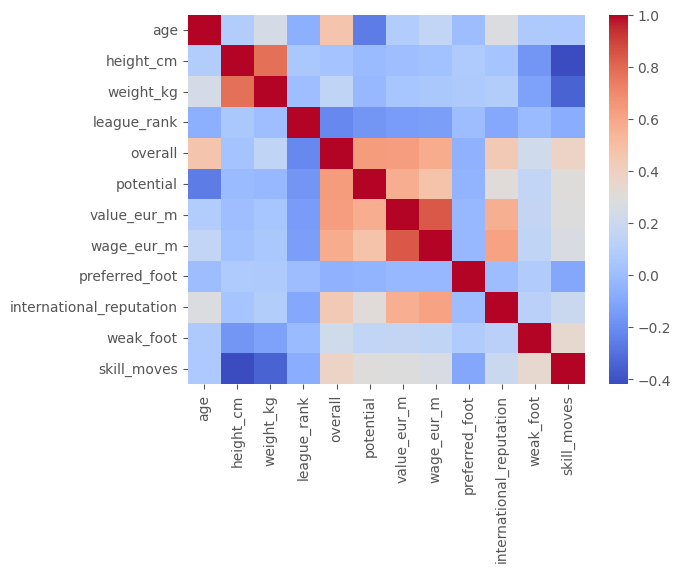

In [ ]:
corr_feat = df1.corr()
sns.heatmap(corr_feat,cmap='coolwarm')

## According to the correlation matrix, the variables that are most highly correlated and likely to be the best explanatory factors for a player's value in millions of euros are: overall rating, potential, player salary, and international reputation.

In [ ]:
X=df1.drop(["value_eur_m"],axis=1).values
y=df1["value_eur_m"].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (15155, 11)
X_test shape:  (3789, 11)
y_train shape:  (15155, 1)
y_test shape:  (3789, 1)


In [ ]:
# Standization and normalization data

rb=RobustScaler()
X_train=rb.fit_transform(X_train)
X_test=rb.transform(X_test)

In [ ]:
# Regression algorithms

lr=LinearRegression()
svr=SVR()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gr=GradientBoostingRegressor()
knn=KNeighborsRegressor()
gb=GaussianProcessRegressor()

In [ ]:
# Evaluation of algorithms
models = [ lr, svr, dt, rf, gr, knn,gb]
overral=pd.DataFrame(columns=["Model","R2 Score",
                              "RMSE","MAE","MSE"])
for model in models:

    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)


    overral=overral.append({"Model":model.__class__.__name__,
                            "R2 Score":r2,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse},ignore_index=True)


overral=overral.sort_values(by="R2 Score",ascending=False)
overral=overral.style.background_gradient(cmap="coolwarm")
overral

<ipython-input-53-6b613366a6ff>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overral=overral.append({"Model":model.__class__.__name__,
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-53-6b613366a6ff>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overral=overral.append({"Model":model.__class__.__name__,
<ipython-input-53-6b613366a6ff>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overral=overral.append({"Model":model.__class__.__name__,
<ipython-input-53-6b613366a6ff>:7: DataConversionW

,Model,R2 Score,RMSE,MAE,MSE
4,GradientBoostingRegressor,0.985599,0.638253,0.194540,0.407367
3,RandomForestRegressor,0.979927,0.753533,0.153218,0.567812
2,DecisionTreeRegressor,0.973122,0.871957,0.171379,0.760309
5,KNeighborsRegressor,0.822081,2.243405,0.616765,5.032865
0,LinearRegression,0.742022,2.701390,1.268981,7.297509
1,SVR,0.668070,3.064217,0.519554,9.389428
6,GaussianProcessRegressor,0.425947,4.029694,1.167353,16.238437


# Project conclusions

## The team with the highest average player value and the lowest average age is Manchester City, boasting an average player age of 24.6 years.

## It appears that the player's value in millions of euros is most strongly correlated with several factors, including their overall rating, international reputation, player salary, and potential.

## Among the regression models used in the analysis, Gradient Boosting for regression stands out as the top performer, achieving a remarkable R-squared (R2) score of 0.985. Following closely behind, Random Forest also demonstrates strong predictive capabilities with an R2 score of 0.979.